In [7]:
import pandas as pd
import numpy as np
from data_process import *
from metadata import *
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import seaborn as sns

In [18]:
init_notebook_mode(connected=True)
cf.go_offline()

In [56]:
def toss_win_to_win_count():
    """
    Return the Dataframe with match win to toss win percentage
    """
    toss_match_df = season_summary_df[['toss_won', 'winner']].dropna()
    toss_match_df['win'] = toss_match_df['toss_won'] == toss_match_df['winner']
    toss_match_df['win'] = toss_match_df['win'].astype(int)
    
    toss_match_df['toss'] = 1
    toss_match_df = toss_match_df.groupby(['winner']).sum().reset_index() 
    toss_match_df['toss_win_percentage'] = toss_match_df['win']*100/toss_match_df['toss']
    
    toss_match_df = toss_match_df[toss_match_df['winner'] != 'No Result']
    return toss_match_df
    

toss_win_to_win_count().iplot(kind='bar', x='winner', y='toss_win_percentage', title='Toss Win to Win Percentage',  barmode = 'group')
    

In [57]:
def ground_toss_decision():
    """
    This function will return the dataframe for every ground % of BAT FIRST and BOWL FIRST
    """
    venue_toss_df = season_summary_df[['venue_id','venue_name', 'decision']].dropna()
    venue_toss_df['bat_first'] = venue_toss_df['decision'].str.contains('BAT').astype(int)
    venue_toss_df['toss'] = 1
    venue_toss_df = venue_toss_df.groupby(['venue_id', 'venue_name']).sum().reset_index()
    venue_toss_df['bat_first_percentage'] = venue_toss_df['bat_first']*100/venue_toss_df['toss']
    venue_toss_df['bowl_first_percentage'] = 100 - venue_toss_df['bat_first_percentage']
    return venue_toss_df

ground_toss_decision().iplot(kind='bar', x='venue_name', y=['bat_first_percentage','bowl_first_percentage'], title='Ground Toss Decision', barmode='group')
    
    

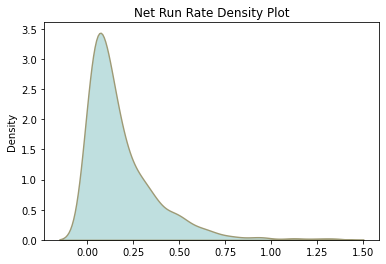

In [9]:
# Density Plot of Net Run Rate

# over to balls
def over_to_balls(over):
    over = str(over)
    ov = int(over.split('.')[0])
    balls = int(over.split('.')[1])
    return ov*6 + balls


def net_run_rate_density():
    """
    This function will return the density plot of net run rate
    """
    net_run_rate_df = season_summary_df[['away_runs', 'away_overs', 'home_overs', 'home_runs']].dropna()
    net_run_rate_df['home_balls'] = net_run_rate_df['home_overs'].map(lambda x: over_to_balls(x))
    net_run_rate_df['away_balls'] = net_run_rate_df['away_overs'].map(lambda x: over_to_balls(x))
    net_run_rate_df['nrr1'] = net_run_rate_df['home_runs']/net_run_rate_df['home_balls'] - net_run_rate_df['away_runs']/net_run_rate_df['away_balls']
    net_run_rate_df['nrr2'] = -1*net_run_rate_df['nrr1']
    nrr = list(net_run_rate_df['nrr1']) + list(net_run_rate_df['nrr2'])
    nrr = [i for i in nrr if i >= 0]
    nrr = np.array(nrr)
    sns.kdeplot(nrr, shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("Net Run Rate Density Plot")

net_run_rate_density()


In [19]:
# team with highest net run rate
def team_with_highest_avg_net_run_rate():
    net_run_rate_df = season_summary_df[['away_runs', 'away_overs', 'home_overs', 'home_runs','home_team','away_team']].dropna()
    net_run_rate_df['home_balls'] = net_run_rate_df['home_overs'].map(lambda x: over_to_balls(x))
    net_run_rate_df['away_balls'] = net_run_rate_df['away_overs'].map(lambda x: over_to_balls(x))
    net_run_rate_df['home_nrr'] = net_run_rate_df['home_runs']/net_run_rate_df['home_balls'] - net_run_rate_df['away_runs']/net_run_rate_df['away_balls']
    net_run_rate_df['away_nrr'] = -1*net_run_rate_df['home_nrr']
    home_df = net_run_rate_df[['home_team','home_nrr']]
    home_df.columns = ['team', 'nrr']
    away_df = net_run_rate_df[['away_team','away_nrr']]
    away_df.columns = ['team', 'nrr']
    nrr_df = pd.concat([home_df, away_df])
    nrr_df['matches'] = 1
    nrr_df = nrr_df.groupby(['team']).sum().reset_index()
    nrr_df['avg_nrr'] = nrr_df['nrr']/nrr_df['matches']
    nrr_df = nrr_df.sort_values(by='avg_nrr', ascending=False)
    nrr_df = nrr_df.reset_index(drop=True)
    return nrr_df

team_with_highest_avg_net_run_rate().iplot(kind='bar', x='team', y='avg_nrr', title='Team with highest net run rate', barmode='group')
